<a href="https://colab.research.google.com/github/21F21604/AI-shopping-system/blob/main/Asian_vs_African_Elephants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Asian_African/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/Asian_African/test'    # Update with your actual path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/Asian_African/train/African')))
print(len(os.listdir('/content/drive/MyDrive/Asian_African/train/Asian')))
print(len(os.listdir('/content/drive/MyDrive/Asian_African/test/African')))
print(len(os.listdir('/content/drive/MyDrive/Asian_African/test/Asian')))

430
420
97
91


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (Asian vs African)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 680 images belonging to 2 classes.
Found 170 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:
# create CNN model - custom-made

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 220s 10s/step - accuracy: 0.5376 - loss: 1.7099 - val_accuracy: 0.4941 - val_loss: 0.6932
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.5668 - loss: 0.6872 - val_accuracy: 0.5471 - val_loss: 0.6858
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.6278 - loss: 0.6485 - val_accuracy: 0.5647 - val_loss: 0.6939
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.6791 - loss: 0.6226 - val_accuracy: 0.5176 - val_loss: 0.7226
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.7499 - loss: 0.5258 - val_accuracy: 0.5353 - val_loss: 0.8812
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.7796 - loss: 0.4946 - val_accuracy: 0.5176 - val_loss: 0.9687
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.8193 - loss: 0.3879 - val_accuracy: 0.5412 - val_loss: 1.1646
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.8606 - loss: 0.3016 - val_accuracy: 0.4824 - 

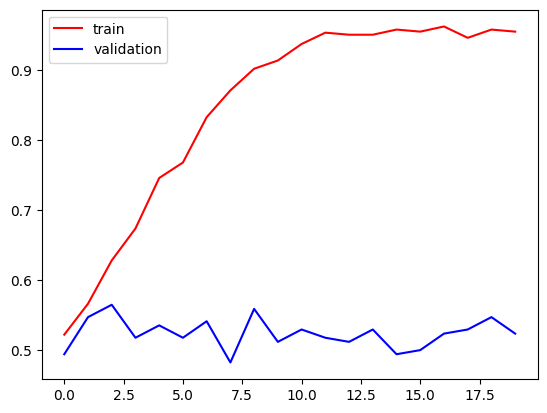

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

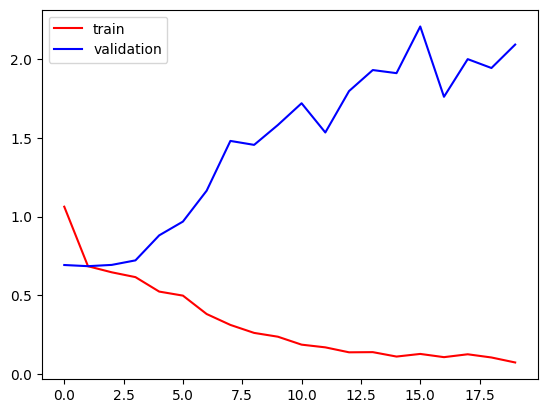

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 188 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = model.predict(test_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 44s 8s/step


In [13]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[44 53]
 [42 49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.45      0.48        97
           1       0.48      0.54      0.51        91

    accuracy                           0.49       188
   macro avg       0.50      0.50      0.49       188
weighted avg       0.50      0.49      0.49       188



In [14]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 160s 7s/step - accuracy: 0.5552 - loss: 8.5480 - val_accuracy: 0.5059 - val_loss: 2.3776
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 200s 7s/step - accuracy: 0.5712 - loss: 4.1999 - val_accuracy: 0.4412 - val_loss: 1.8070
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 202s 7s/step - accuracy: 0.6008 - loss: 3.2805 - val_accuracy: 0.5059 - val_loss: 4.1908
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 149s 7s/step - accuracy: 0.6035 - loss: 3.2480 - val_accuracy: 0.5059 - val_loss: 7.5995
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 151s 7s/step - accuracy: 0.6513 - loss: 1.8627 - val_accuracy: 0.5059 - val_loss: 4.5486
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 155s 7s/step - accuracy: 0.6352 - loss: 1.2696 - val_accuracy: 0.5235 - val_loss: 2.2627
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 151s 7s/step - accuracy: 0.6513 - loss: 1.1841 - val_accuracy: 0.5118 - val_loss: 1.4071
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 204s 7s/step - accuracy: 0.6472 - loss: 1.2484 - val_accuracy: 0.5353 - v

In [17]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 188 images belonging to 2 classes.


In [18]:
predictions = model.predict(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[40 57]
 [39 52]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.51      0.41      0.45        97
           1       0.48      0.57      0.52        91

    accuracy                           0.49       188
   macro avg       0.49      0.49      0.49       188
weighted avg       0.49      0.49      0.49       188



In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 203s 9s/step - accuracy: 0.5142 - loss: 4.7640 - val_accuracy: 0.4941 - val_loss: 2.0953
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 185s 9s/step - accuracy: 0.5182 - loss: 1.3776 - val_accuracy: 0.5059 - val_loss: 1.0606
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 186s 9s/step - accuracy: 0.5526 - loss: 0.8716 - val_accuracy: 0.5176 - val_loss: 0.7294
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 184s 9s/step - accuracy: 0.5787 - loss: 0.7077 - val_accuracy: 0.4706 - val_loss: 0.7618
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 180s 8s/step - accuracy: 0.5766 - loss: 0.6512 - val_accuracy: 0.5176 - val_loss: 0.7149
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 179s 8s/step - accuracy: 0.5975 - loss: 0.6568 - val_accuracy: 0.5353 - val_loss: 0.7278
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 183s 8s/step - accuracy: 0.5664 - loss: 0.7185 - val_accuracy: 0.5588 - val_loss: 0.7148
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 181s 8s/step - accuracy: 0.6319 - loss: 0.6308 - val_accuracy: 0.5471 - v

In [23]:
predictions = resnet_model.predict(test_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 45s 7s/step


In [24]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[21 76]
 [24 67]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.47      0.22      0.30        97
           1       0.47      0.74      0.57        91

    accuracy                           0.47       188
   macro avg       0.47      0.48      0.43       188
weighted avg       0.47      0.47      0.43       188

